## Bibliotecas 

In [1]:

import   numpy  as np
import   pandas as pd
import   matplotlib.pyplot as plt
import   seaborn as sns; sns.set()
import   sklearn.metrics as mt
import   sklearn.model_selection as modSel   
import   pickle

from     time import time 
from     sklearn.metrics import confusion_matrix
from     sklearn.tree import DecisionTreeClassifier   
from     sklearn.cross_validation import train_test_split    

from     sklearn import tree
from     graphviz import Source
from     IPython.display import SVG
from     IPython.display import display
from     IPython.display import Image


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Funções de Apoio

In [26]:

fileModel      =   'DecisionTreeClassifier.model'


def f_drawDecisionTree( model, labels_y, labels_x ):
    graph      =  Source( tree.export_graphviz( model, out_file=None, feature_names=labels_x, class_names=labels_y, filled=True ))
    display( SVG( graph.pipe( format='svg' )))
    png_bytes  =  graph.pipe( format='png' )
    with open( 'dtree_pipe.png','wb' ) as o_file:
        o_file.write( png_bytes )
        
    Image( png_bytes )


def f_saveModel( model ):    
    pickle.dump( model, open( fileModel, 'wb' ))    


def f_loadModel( ):
    model = pickle.load( open( fileModel, 'rb' ))
    return model    

    

## Análise Base de Dados & Limpeza

In [3]:

# carrega base de dados
df  =  pd.read_csv( '1. baseDeDados_Original.csv' )

# exibe os 5 primeiro registros
df.head( 5 )


,id_cliente,cla_cliente,tot_orcamento,fat_cliente,des_orcamento,por_desconto,fec_orcamentos,rec_orcamentos
0,100,L,7290,7070,220,"00,03",2,9
1,101,J,6050,5980,70,"00,01",6,1
2,102,F,15210,14290,920,"00,06",5,6
3,103,F,11540,11300,240,"00,02",1,9
4,104,K,1900,1820,80,"00,04",6,6


In [4]:

# renomeia colunas
df = df.rename( columns = {  'cla_cliente'      :   'classificação'            ,   
                             'tot_orcamento'    :   'total orçamento'          ,
                             'fat_cliente'      :   'faturamento cliente'      ,
                             'des_orcamento'    :   'desconto orçamento'       ,
                             'por_desconto'     :   'porcentagem de desconto'  ,
                             'fec_orcamentos'   :   'qtd. fechados'            ,
                             'rec_orcamentos'   :   'qtd. recusados'           })

# exibe os 5 primeiro registros
df.head( 5 )


,id_cliente,classificação,total orçamento,faturamento cliente,desconto orçamento,porcentagem de desconto,qtd. fechados,qtd. recusados
0,100,L,7290,7070,220,"00,03",2,9
1,101,J,6050,5980,70,"00,01",6,1
2,102,F,15210,14290,920,"00,06",5,6
3,103,F,11540,11300,240,"00,02",1,9
4,104,K,1900,1820,80,"00,04",6,6


In [5]:

# verifica o total de registros na base de dados que estejam em branco ( nulos )
print( "{:0>4} : total de registros ( células ) vazios!" .format( sum( df.isnull().sum())))


0000 : total de registros ( células ) vazios!


In [6]:

# exibe o tipo de dados em cada coluna
df.dtypes


id_cliente                  int64
classificação              object
total orçamento             int64
faturamento cliente         int64
desconto orçamento          int64
porcentagem de desconto    object
qtd. fechados               int64
qtd. recusados              int64
dtype: object

In [7]:

# filtra registros de pessoas que não tenham apresentado gastos no período determinado, ou seja,
# não são consideradas clientes no próximo período
df[ df[ 'total orçamento' ] == 0 ]


,id_cliente,classificação,total orçamento,faturamento cliente,desconto orçamento,porcentagem de desconto,qtd. fechados,qtd. recusados
249,349,Z,0,0,0,"00,00",0,5
485,585,Z,0,0,0,"00,00",0,8
639,739,Z,0,0,0,"00,00",0,2
925,1025,Z,0,0,0,"00,00",0,7
950,1050,Z,0,0,0,"00,00",0,3
1239,1339,Z,0,0,0,"00,00",0,5
1248,1348,Z,0,0,0,"00,00",0,4
1579,1679,Z,0,0,0,"00,00",0,2


In [8]:

# remove registros de pessoas que no período não apresentaram gastos ( resíduo / lixo dep. DataScience )
df = df.drop([ 249, 485, 639, 925, 950, 1239, 1248, 1579 ])


In [9]:

# verifica exclusão de registros
df[ df[ 'total orçamento' ] == 0 ]


,id_cliente,classificação,total orçamento,faturamento cliente,desconto orçamento,porcentagem de desconto,qtd. fechados,qtd. recusados


In [10]:

# salva dataFrame sem registros inválidos
df.to_csv( '2. baseDeDados_Limpa.csv', index=False )


## Pré-processamento

In [11]:

# cria atributo análise, oriundo da diferença entre orçamentos fechados Vs orçamentos recusados
df[ 'analise' ] = df[ 'qtd. fechados' ] - df[ 'qtd. recusados' ]

# exibe os 5 primeiro registros
df.head( 5 )


,id_cliente,classificação,total orçamento,faturamento cliente,desconto orçamento,porcentagem de desconto,qtd. fechados,qtd. recusados,analise
0,100,L,7290,7070,220,"00,03",2,9,-7
1,101,J,6050,5980,70,"00,01",6,1,5
2,102,F,15210,14290,920,"00,06",5,6,-1
3,103,F,11540,11300,240,"00,02",1,9,-8
4,104,K,1900,1820,80,"00,04",6,6,0


In [12]:

# a função map substitui valores, retornando resultado em uma nova coluna 
# valores inteiros são convertidos em categorias
df[ 'aceitabilidade' ] = df[ 'analise' ].map({  -9 : 'baixa' ,
                                                -8 : 'baixa' ,
                                                -7 : 'baixa' ,
                                                -6 : 'baixa' ,
                                                -5 : 'baixa' ,
                                                -4 : 'baixa' ,
                                                -3 : 'baixa' ,
                                                -2 : 'baixa' ,
                                                -1 : 'baixa' ,
                                                 0 : 'média' ,
                                                 1 : 'alta'  ,
                                                 2 : 'alta'  ,
                                                 3 : 'alta'  ,
                                                 4 : 'alta'  ,
                                                 5 : 'alta'  ,
                                                 6 : 'alta'  ,
                                                 7 : 'alta'  ,
                                                 8 : 'alta'  ,
                                                 9 : 'alta'  ,
                                                10 : 'alta'      })

# exibe os 5 primeiro registros
df.head( 5 )


,id_cliente,classificação,total orçamento,faturamento cliente,desconto orçamento,porcentagem de desconto,qtd. fechados,qtd. recusados,analise,aceitabilidade
0,100,L,7290,7070,220,"00,03",2,9,-7,baixa
1,101,J,6050,5980,70,"00,01",6,1,5,alta
2,102,F,15210,14290,920,"00,06",5,6,-1,baixa
3,103,F,11540,11300,240,"00,02",1,9,-8,baixa
4,104,K,1900,1820,80,"00,04",6,6,0,média


In [13]:

# exclui colunas que serão desnecessárias para análises posteriores
df = df.drop( [ 'id_cliente', 'analise', 'total orçamento', 'porcentagem de desconto', 'qtd. fechados', 'qtd. recusados' ], axis=1 )

# exibe os 5 primeiro registros
df.head( 5 )


,classificação,faturamento cliente,desconto orçamento,aceitabilidade
0,L,7070,220,baixa
1,J,5980,70,alta
2,F,14290,920,baixa
3,F,11300,240,baixa
4,K,1820,80,média


In [14]:

# exibe estatísticas da base de dados
df.describe()


,faturamento cliente,desconto orçamento
count,1736.000000,1736.000000
mean,7660.051843,284.942396
std,4259.840514,276.221932
min,100.000000,0.000000
25%,3990.000000,60.000000
50%,7825.000000,190.000000
75%,11320.000000,450.000000
max,15000.000000,1390.000000


In [15]:

# prepara dados para aplicar Técnica One Hot Encoding nos dados que servirão de Entrada
dfX  =  df
dfX  =  df.drop( [ 'classificação' ], axis=1 )


# aplica Técnica One-Hot Encoding no dataFrame para converter dados categóricos em binários
dfN  =  pd.get_dummies( dfX )


# acrescenta a base de dados os dados categóricos de saída a serem previstos eles foram eliminados
# da base durante transição para que não sofressem efeitos da Técnica One Hot-Encoding
dfN[ 'classificação' ]  =  df[ 'classificação' ]


# regorganiza as colunas
dfN = dfN[[ 'classificação', 
            'faturamento cliente',
            'desconto orçamento',
            'aceitabilidade_alta',
            'aceitabilidade_média',
            'aceitabilidade_baixa' ]]


# exibe os 5 primeiro registros
dfN.head( 5 )


,classificação,faturamento cliente,desconto orçamento,aceitabilidade_alta,aceitabilidade_média,aceitabilidade_baixa
0,L,7070,220,0,0,1
1,J,5980,70,1,0,0
2,F,14290,920,0,0,1
3,F,11300,240,0,0,1
4,K,1820,80,0,1,0


In [16]:

# salva dataFrame préprocessado & normalizado
dfN.to_csv( '3. baseDeDados_Normalizada.csv', index=False )


## Machine Learning: DecisionTreeClassifier

In [17]:

# desmembra base de dados em dados de entrada ( dfX ) e dados de saída ( dfy )
dfX  =  dfN
dfX  =  dfN.drop( [ 'classificação' ], axis=1 )
dfy  =  dfN[ 'classificação' ]


In [18]:

# a função train_tes_split desmembra o DataFrame em conjuntos de treinamento (aprendizado) e teste
# O parâmetro test_size indica um valor percentual (expresso de modo decimal) de quantos registros
# serão reservados para o teste, o residual será destinado para o treinamento
X_train, X_test, y_train, y_true = train_test_split( dfX, dfy, test_size=0.30, random_state=42 )


# atribui o tempo a variável
t0 = time()


# cria Árvore de Decisão de Classificação
model = DecisionTreeClassifier( random_state=42 )


# cria um dicionário (simples) contendo listas internamente, cada qual expressando um parâmetro
# cada parâmetro contém internamente suas possíveis configurações as quais serão exploradas
parameters = { 
    'max_depth'           :  [ 2, 3, 4, 5, 6, 7 ], 
    'min_samples_leaf'    :  [ 2, 3, 4, 5, 6, 7 ], 
    'min_samples_split'   :  [ 2, 3, 4, 5, 6, 7 ] 
}


# cria objeto f_beta_score scoring
scorer  =  mt.make_scorer( mt.f1_score, average='micro' )


# cria um objeto GridSearch, configurando-o de acordo com o cenário 
# algoritmo de Machine Learning, parâmetros a serem configurados e scoring de pontuação.
modelGrid  =  modSel.GridSearchCV( model, parameters, scoring=scorer )


# treina o objeto GridSearch, buscando os melhores parâmetros internamente
modelGridFit  =  modelGrid.fit( X_train, y_train )


# retorna os melhores parâmetros encontrados
modelBest  =  modelGridFit.best_estimator_


# treina o melhor modelo selecionado
modelBest.fit( X_train, y_train )


# faz previsões usando o novo modelo
y_predTrain  =  modelBest.predict( X_train )
y_predTest   =  modelBest.predict( X_test  )


# atribui o tempo a variável
t1  =  time()


# exibe parâmetros selecionados no modelo
print( 'parâmetros selecionados: {}' .format( modelBest ))


parâmetros selecionados: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [19]:

# exibe quanto tempo o algoritmo levou para aprender “algo”
print( "{:7.2f} : Tempo de treinamento" .format( round( t1-t0, 3)))    

# calcula o f1_score do novo modelo e o exibe para o treinamento e para o teste
print( '{:7.2f} : F1 Score de treinamento.' .format( mt.f1_score( y_train, y_predTrain, average='micro' )))
print( '{:7.2f} : F1 Score de teste.'       .format( mt.f1_score( y_true, y_predTest,   average='micro' )))


   5.74 : Tempo de treinamento
   1.00 : F1 Score de treinamento.
   1.00 : F1 Score de teste.


Text(180.98,0.5,'y: predição')

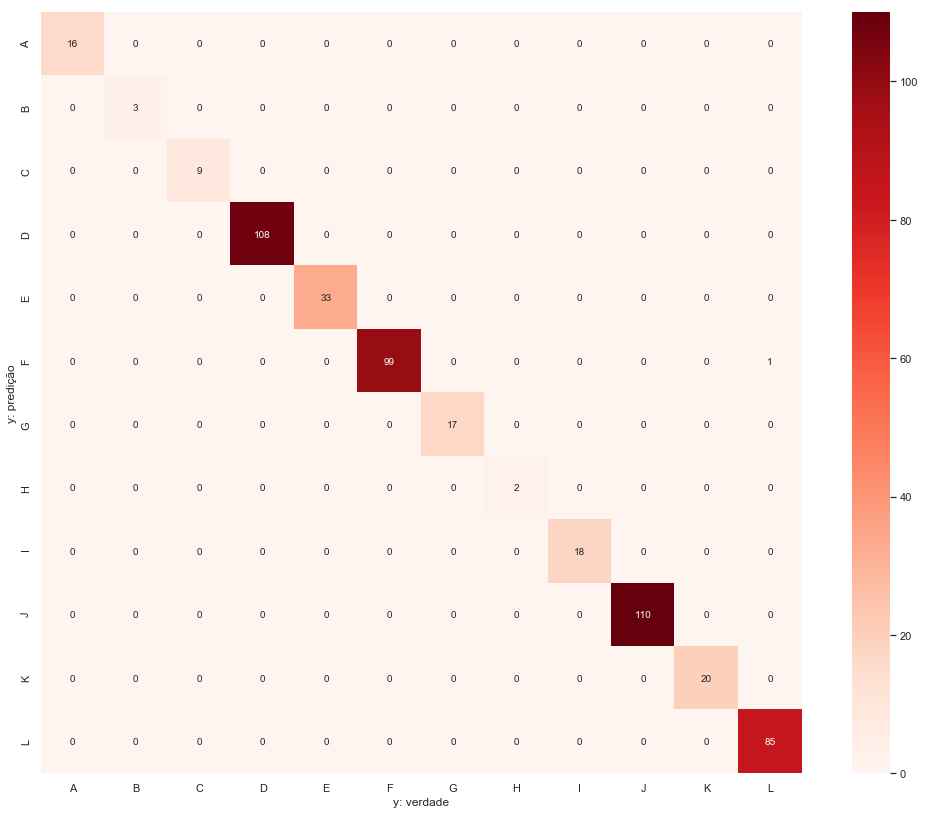

In [20]:

# define o tamanho do gráfico
plt.figure( figsize = ( 18, 14 ))


# exibe matriz confusão em cores
labels   =   [ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L' ]
mat      =   confusion_matrix( y_true, y_predTest )
sns.heatmap( mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=labels, yticklabels=labels , cmap="Reds" )


# configura eixos
plt.xlabel( 'y: verdade'  )
plt.ylabel( 'y: predição' ) 


In [21]:

# exibe matriz confusão SEM cores
print( mt.confusion_matrix( y_true, y_predTest ))


[[ 16   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   0 108   0   0   0   0   0   0   0   0]
 [  0   0   0   0  33   0   0   0   0   0   0   0]
 [  0   0   0   0   0  99   0   0   0   0   0   1]
 [  0   0   0   0   0   0  17   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0  18   0   0   0]
 [  0   0   0   0   0   0   0   0   0 110   0   0]
 [  0   0   0   0   0   0   0   0   0   0  20   0]
 [  0   0   0   0   0   0   0   0   0   0   0  85]]


In [22]:

# exibe relatório de classificação, apresentando as principais métricas de avaliação de um modelo
print( mt.classification_report( list( y_true ), list( y_predTest ), target_names=labels ))


             precision    recall  f1-score   support

          A       1.00      1.00      1.00        16
          B       1.00      1.00      1.00         3
          C       1.00      1.00      1.00         9
          D       1.00      1.00      1.00       108
          E       1.00      1.00      1.00        33
          F       1.00      0.99      0.99       100
          G       1.00      1.00      1.00        17
          H       1.00      1.00      1.00         2
          I       1.00      1.00      1.00        18
          J       1.00      1.00      1.00       110
          K       1.00      1.00      1.00        20
          L       0.99      1.00      0.99        85

avg / total       1.00      1.00      1.00       521



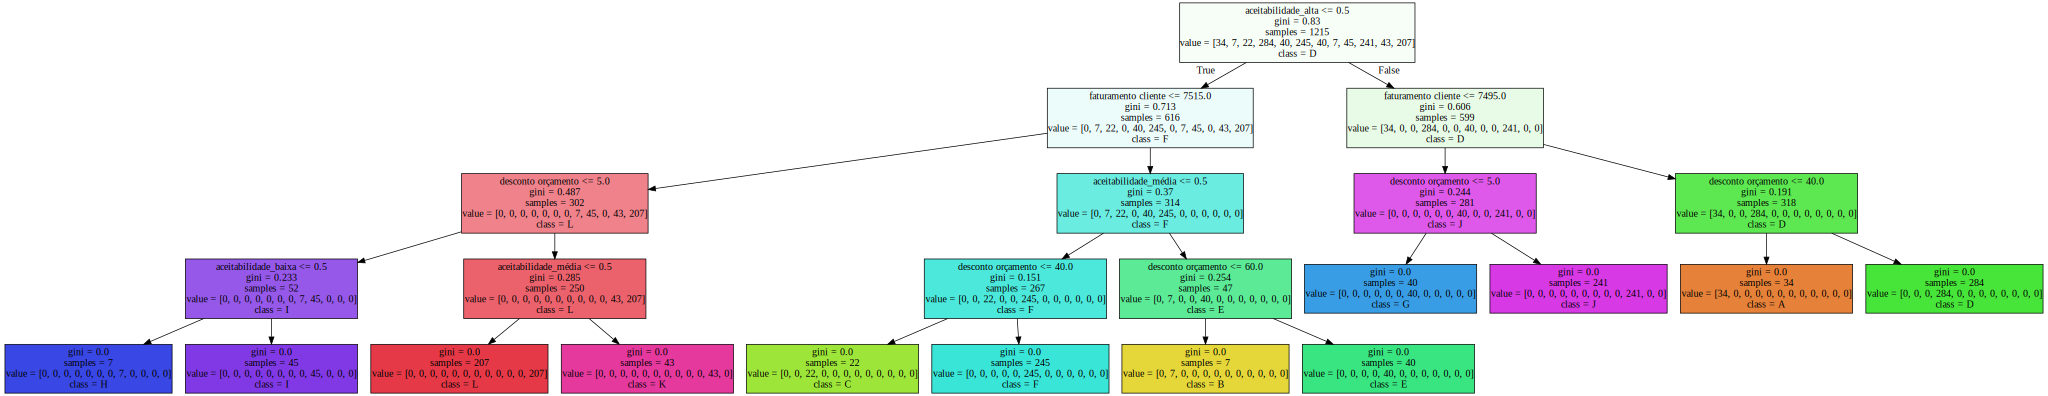

In [23]:

labels_y  =  [ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L' ]
labels_x  =  [ 'faturamento cliente', 'desconto orçamento', 'aceitabilidade_alta', 'aceitabilidade_média', 'aceitabilidade_baixa']
f_drawDecisionTree( modelBest, labels_y, labels_x )


## Persistência do Modelo

In [27]:

# salva modelo de aprendizado máquina no disco
f_saveModel( modelBest )


In [28]:

# carrega modelo salvo em disco para ser usado conforme for necessário dispensando 
# a necessidade de treinamento, configuração ou testes novamente 
modelNew = f_loadModel()
